##### libraries 

Additional libraries (not used for regression)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings #ignore the errors for newer version of distplot
warnings.filterwarnings("ignore", category=UserWarning) 

from sklearn.preprocessing import StandardScaler

Libraries for regression in scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression #for linear (parameter) regression
from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
from sklearn.preprocessing import PolynomialFeatures #to do a polynomial regression

from sklearn.pipeline import Pipeline #to use pipelines

##### Database for this notebook

In [10]:
url=file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df=pd.read_csv(url)
print('In this database there are m =',df.shape[0],'data with D =',df.shape[1],'features.')

def NaN_value_finder(dataframe):
    dataframe=dataframe.replace('?',np.nan)
    missing_data = dataframe.isnull()
    missing_dict=dict()
    missing_index=list()
    for column in missing_data.columns.values.tolist():
        for i,value in enumerate(missing_data[column]):
            if missing_data[column][i]==True:
                missing_index.append(i)
                missing_dict[column]=missing_dict.get(column,0)+1
    for i,value in enumerate(missing_dict):
        print('There are', missing_dict[value], 'null values in the column',value)
    return missing_dict, missing_index

def Z_score_normalization(df, type):
    for i, value in enumerate(df.columns):
        if df[value].dtype.name == type:
            df[value] = (df[value] - df[value].mean()) / df[value].std()
            # df.rename(columns={value: 'Z-normalized ' + value}, inplace=True)
    
Z_score_normalization(df,'float64')


NaN_value_finder(df)

df.head(2)

In this database there are m = 201 data with D = 29 features.
There are 4 null values in the column stroke
There are 1 null values in the column horsepower-binned


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,-1.68091,-0.438315,...,-0.290709,0.203247,-0.246103,21,27,0.036224,0.491727,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,-1.68091,-0.438315,...,-0.290709,0.203247,-0.246103,21,27,0.414350,0.491727,Medium,0,1


To see the typ of correlation between the variables, we can do a scatter plot: if the correlation is linear we can use a linear fit:

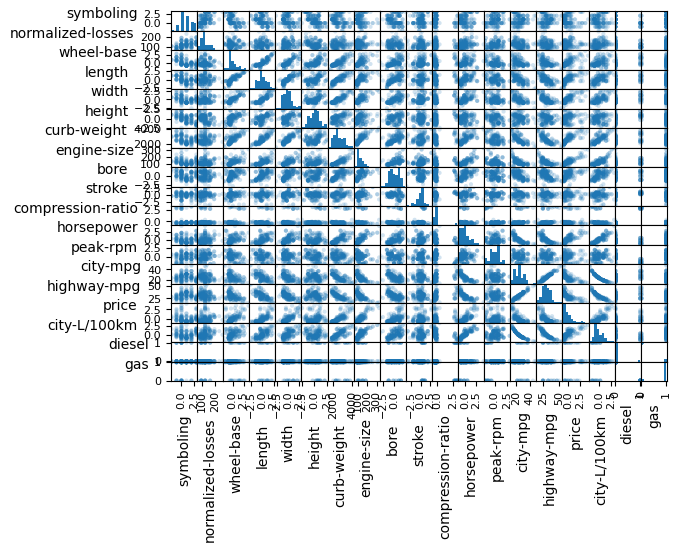

In [23]:
axes = pd.plotting.scatter_matrix(df._get_numeric_data(), alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

# LINEAR (single and multiple) variable, linear regression with R^2/MSE

We try to make a (SINGLE) linear regression using as data {x;y}={'highway-mpg','price'} and then a (MULTIPLE) linear regression using {(x1,x2,x3,x4),y}={('horsepower','curb-weight','engine-size','highway-mpg'),'price'}. Finally we do the in-sample evaluation, or the error test on the training test.

## Single variable

It is important for scikit-learn that the X tensor that we pass to the **.fit(X,y)** model should be of the form **X=(number_of_observations=m, number_of_features=D)**. For the single variable regression, it must be (m,1). If it is of the form (m), we must use **X.reshape(-1, 1)**.

In [13]:
lmsingle = LinearRegression() #lm is for linear model, in the parameters
target='price'

single=['highway-mpg']
x = df[single] #fundamental to insert two [[]]; the second parenthesis is in the 'single' variable defined in the previous line
y = df[target] #pandas series

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
lmsingle.fit(x,y)
yhat=lmsingle.predict(x) #numpy array

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression                  
print('(',target,')hat=',lmsingle.intercept_,'+',lmsingle.coef_[0],'*',single[0],'\n')
print('the MSE is',mean_squared_error(y,yhat),'and the R^2 error is',lmsingle.score(x,y),'or',r2_score(y,yhat))

( price )hat= 3.173016987646062 + -0.10340084541453606 * highway-mpg 

the MSE is 0.500904290115505 and the R^2 error is 0.4965911884339175 or 0.4965911884339175


In [14]:
x.shape

(201, 1)

The MSE is computed in the standard way:

In [28]:
((y-yhat)**2).mean()

np.float64(0.500904290115505)

Linear regression by hand:

In [29]:
xvector=x['highway-mpg']
yvector=y

def covariance(vecx,vecy):
    return (np.dot(vecx,vecy)-(vecx.mean()*vecy.mean())*(vecy.size))/(vecy.size)

#test: covariance(xvector,xvector)-np.var(xvector)

# the best values for the fit are (a,b) in the following yhat=a*x+b

a=covariance(xvector,yvector)/covariance(xvector,xvector)
b=yvector.mean()-a*xvector.mean()

print('(',target,')hat=',b,'+',a,'*',single[0],'\n')

( price )hat= 3.1730169876460717 + -0.10340084541453638 * highway-mpg 



Now we visualize if the fits are good or not. If the points are near to the line in a regression plot we are happy, and also we are happy if the data are distribuited uniformly around the x-axis in a residual plot, because it means that the variance is constant.

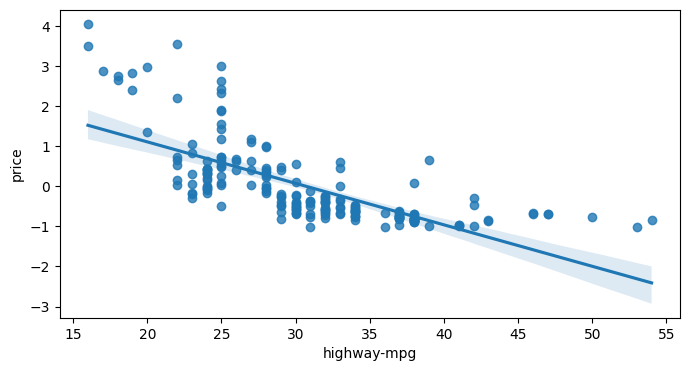

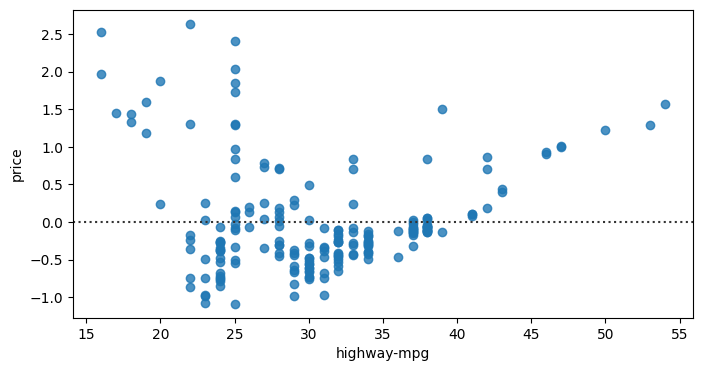

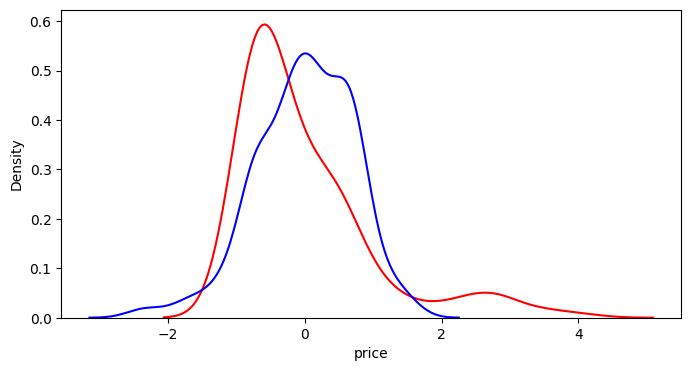

In [30]:
plt.figure(figsize=(8, 4))
sns.regplot(x=single[0],y=target,data=df)
plt.show()
plt.close()
###########
plt.figure(figsize=(8, 4))
sns.residplot(data=df,x=single[0],y=target)
plt.show()
plt.close()
###########
plt.figure(figsize=(8, 4))
ax1=sns.distplot(y,hist=False,color='r',label='Actual Values')
sns.distplot(yhat,hist=False,color='b',label='Predicted Values',ax=ax1)
plt.show()
plt.close()

## Multiple variables 

In [15]:

lmmultiple = LinearRegression() #lm is for linear model, in the parameters

multiple=['horsepower','curb-weight','engine-size','highway-mpg']
target='price'
X = df[multiple] #fundamental to insert two [[]]
y = df[target]

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
lmmultiple.fit(X,y)
yhat=lmmultiple.predict(X)

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
print('(',target,')hat=',lmmultiple.intercept_,'+',lmmultiple.coef_[0],'*',multiple[0],'+',lmmultiple.coef_[1],'*',multiple[1],'+',lmmultiple.coef_[2],'*',multiple[2],'+',lmmultiple.coef_[3],'*',multiple[3],'\n')
print('the MSE is',mean_squared_error(y,yhat),'and the R^2 error is',lmmultiple.score(X,y),'or',r2_score(y,yhat))

( price )hat= -2.9548008001649 + 0.25152752190367755 * horsepower + 0.000592382244221351 * curb-weight + 0.010259164868294283 * engine-size + 0.004537207475694327 * highway-mpg 

the MSE is 0.18969524312662117 and the R^2 error is 0.8093562806577457 or 0.8093562806577457


Now we visualize if the fits are good or not. If the points are near to the line in a regression plot we are happy, and also we are happy if the data are distribuited uniformly around the x-axis in a residual plot, because it means that the variance is constant.

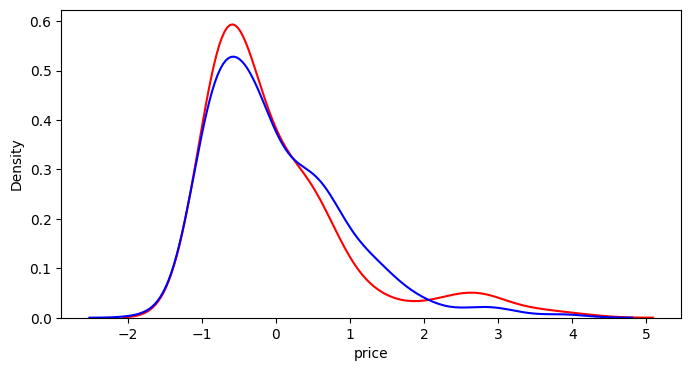

In [16]:
plt.figure(figsize=(8, 4))
ax1=sns.distplot(y,hist=False,color='r',label='Actual Values')
ax2=sns.distplot(yhat,hist=False,color='b',label='Predicted Values',ax=ax1)
plt.show()
plt.close()

# POLYNOMIAL (single and multiple) variable, linear regression with R^2/MSE

Here we do a polynomial fit. Notice that basically we are using an activation funcion which transform the linear function into a polynomial. Then we have to do a linear fit on the transformed object!

## multi variable

In [21]:
from sklearn.preprocessing import PolynomialFeatures

def function_to_print_multivariate_polynomial(bias, coefficients, feature_names):
    print(f'Bias (intercept) = {bias}')
    print('Polynomial regression model:\n')
    for coef, name in zip(coefficients, feature_names):
        print(f'{coef:+.4f} * {name}')

multiple=['horsepower','curb-weight','engine-size','highway-mpg']
target='price'
X = df[multiple] #fundamental to insert two [[]]
y = df[target]

pm=PolynomialFeatures(degree=2,include_bias=True) #this is a polynomial transformer which includes up to power 2 in each variable (and also products): 1,x1,x2,x1^2,x1x2, x2^2 .......
X_poly=pm.fit_transform(X) #numpy array containing the coefficients of the polynomial above

lm=LinearRegression()
lm.fit(X_poly,y)
yhat=lm.predict(X_poly)

feature_names = pm.get_feature_names_out(multiple)
function_to_print_multivariate_polynomial(lm.intercept_, lm.coef_, feature_names)

print('\nthe MSE is',mean_squared_error(y,yhat),'or',((y-yhat)**2).mean(),'and the R^2 error is',lm.score(X_poly,y),'or',r2_score(y,yhat),'\n')

Bias (intercept) = 2.8864890344918903
Polynomial regression model:

+0.0000 * 1
+3.4341 * horsepower
-0.0012 * curb-weight
-0.0302 * engine-size
-0.0050 * highway-mpg
+0.2977 * horsepower^2
-0.0009 * horsepower curb-weight
-0.0061 * horsepower engine-size
-0.0101 * horsepower highway-mpg
+0.0000 * curb-weight^2
+0.0000 * curb-weight engine-size
-0.0000 * curb-weight highway-mpg
+0.0000 * engine-size^2
+0.0000 * engine-size highway-mpg
+0.0006 * highway-mpg^2

the MSE is 0.15290129653087287 or 0.15290129653087287 and the R^2 error is 0.8463341969864728 or 0.8463341969864728 



## (only for!) single variable

[-1.95875839e-04  2.57647662e-02 -1.12814374e+00  1.56933967e+01] 

             3           2
-0.0001959 x + 0.02576 x - 1.128 x + 15.69 

 [ 0.16060618  0.16060618  0.3359277  -0.25127352]


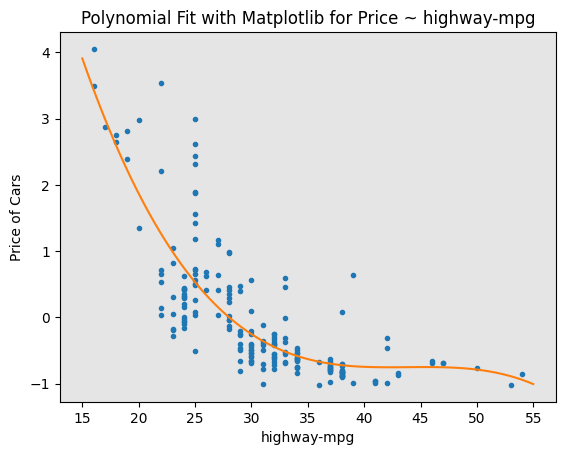

In [22]:
#function to plot fit of polynomial with single variable
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ highway-mpg')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

x = df['highway-mpg'] #one bracket!
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
yhat=p(x)
print(f,'\n\n',p,'\n\n',yhat[0:4])

PlotPolly(p, x, y, 'highway-mpg')

# Using Pipelines

A pipeline is a way to do what we have done above in a single step. Let's try a linear multiple variable fit and compare with the results obtained before:

In [48]:
from sklearn.pipeline import Pipeline 

multiple=['horsepower','curb-weight','engine-size','highway-mpg']
target='price'
X = df[multiple] #fundamental to insert two [[]]
y = df[target]

#input=[('polynomial',PolynomialFeatures(degree=1)),('scale',StandardScaler()),('Model',LinearRegression())]
input=[('polynomial',PolynomialFeatures(degree=1)),('Model',LinearRegression(fit_intercept=False))]

pipe=Pipeline(input)
pipe.fit(X,y)
yhat=pipe.predict(X)


print('(',target,')hat=',pipe.named_steps['Model'].intercept_,'+',pipe.named_steps['Model'].coef_[0],'*',multiple[0],'+',pipe.named_steps['Model'].coef_[1],'*',multiple[1],'+',pipe.named_steps['Model'].coef_[2],'*',multiple[2],'+',pipe.named_steps['Model'].coef_[3],'*',multiple[3],'\n')


print('the MSE is',mean_squared_error(y,yhat),'\n')
print('the R^2 error is',lmmultiple.score(X,y),'or',r2_score(y,yhat),'or',pipe.score(X,y),'\n')

( price )hat= 0.0 + -2.9548008001649104 * horsepower + 0.25152752190367805 * curb-weight + 0.0005923822442213756 * engine-size + 0.010259164868294339 * highway-mpg 

the MSE is 0.18969524312662117 

the R^2 error is 0.8093562806577457 or 0.8093562806577457 or 0.8093562806577457 

